In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
final = pd.read_csv("/content/drive/MyDrive/턱수염2/data/최종/real_final.csv")

In [ ]:
final

,정류장,호선_개수,노선,위도,경도,지역구,주거_장애인_수,6월_장애인_승객수,7월_장애인_승객수,8월_장애인_승객수,...,12월_장애인_승객수,1월_장애인_승객수,2월_장애인_승객수,3월_장애인_승객수,4월_장애인_승객수,5월_장애인_승객수,평균_장애인_승객수,총_장애인_승객수,장애인_편의시설_설치율,승강기_개수
0,가락시장,2,"[3, 8]",37.492245,127.117757,송파구,20571,14248,14304,15118,...,16820,13132,12952,14701,13690,13948,6177.076389,74124.916667,99.42,9.0
1,강동구청,1,[8],37.530341,127.120508,송파구,20571,8439,8147,8585,...,9197,7877,7955,8643,8237,8569,3726.756944,44721.083333,99.42,3.0
2,개롱,1,[5],37.498079,127.134820,송파구,20571,7188,7055,7049,...,7181,6304,6610,7479,6884,7121,3105.375000,37264.500000,99.42,3.0
3,거여,1,[5],37.493105,127.144150,송파구,20571,10028,9683,10204,...,10709,8749,8915,10235,9619,10203,4308.145833,51697.750000,99.42,3.0
4,경찰병원,1,[3],37.495918,127.124540,송파구,20571,5144,5463,5616,...,5691,4984,5080,5412,5150,5274,2338.194444,28058.333333,99.42,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,충정로(경기대입구),2,"[2, 5]",37.559704,126.964378,서대문구,12348,9644,9698,10636,...,11044,9234,9515,10874,10143,9944,4487.708333,53852.500000,99.90,4.0
237,홍제,1,[3],37.589066,126.943736,서대문구,12348,16602,16065,16785,...,18130,14869,15613,17468,16619,17248,7386.256944,88635.083333,99.90,3.0
238,미아(서울사이버대학),1,[4],37.626670,127.025983,강북구,17186,16809,16939,17114,...,18798,15359,15815,18467,17398,17860,7664.493056,91973.916667,98.45,3.0
239,미아사거리,1,[4],37.613292,127.030053,강북구,17186,26412,26890,28940,...,30394,25181,25518,28498,26838,27117,12020.666667,144248.000000,98.45,2.0


## 상위 3개 역 월 별 이용자 수

In [ ]:
top3=final.nlargest(3, '총_장애인_승객수')
top3

,정류장,호선_개수,노선,위도,경도,지역구,주거_장애인_수,6월_장애인_승객수,7월_장애인_승객수,8월_장애인_승객수,...,12월_장애인_승객수,1월_장애인_승객수,2월_장애인_승객수,3월_장애인_승객수,4월_장애인_승객수,5월_장애인_승객수,평균_장애인_승객수,총_장애인_승객수,장애인_편의시설_설치율,승강기_개수
96,종로3가,3,"[1, 3, 5]",37.570406,126.991847,종로구,5834,54424,53282,57170,...,63322,50428,53560,59940,55453,57785,25021.930556,300263.166667,99.63,6.0
163,서울역,6,"[1, 4]",37.556228,126.972135,중구,5552,43633,42756,44849,...,47605,39291,40545,45808,44090,45020,19387.513889,232650.166667,98.40,6.0
14,잠실(송파구청),2,"[2, 8]",37.513262,127.100159,송파구,20571,40515,41151,43195,...,48114,38536,38951,43196,42293,41376,18448.444444,221381.333333,99.42,7.0


In [ ]:
top3.columns

Index(['정류장', '호선_개수', '노선', '위도', '경도', '지역구', '주거_장애인_수', '6월_장애인_승객수',
       '7월_장애인_승객수', '8월_장애인_승객수', '9월_장애인_승객수', '10월_장애인_승객수', '11월_장애인_승객수',
       '12월_장애인_승객수', '1월_장애인_승객수', '2월_장애인_승객수', '3월_장애인_승객수', '4월_장애인_승객수',
       '5월_장애인_승객수', '평균_장애인_승객수', '총_장애인_승객수', '장애인_편의시설_설치율', '승강기_개수'],
      dtype='object')

In [ ]:
top3.set_index("정류장", inplace=True)

In [ ]:
new_order = [
    '총_장애인_승객수', '1월_장애인_승객수', '2월_장애인_승객수', '3월_장애인_승객수', '4월_장애인_승객수',
    '5월_장애인_승객수', '6월_장애인_승객수', '7월_장애인_승객수', '8월_장애인_승객수',
    '9월_장애인_승객수', '10월_장애인_승객수', '11월_장애인_승객수', '12월_장애인_승객수'
]

top3 = top3[new_order]

In [ ]:
top3

,총_장애인_승객수,1월_장애인_승객수,2월_장애인_승객수,3월_장애인_승객수,4월_장애인_승객수,5월_장애인_승객수,6월_장애인_승객수,7월_장애인_승객수,8월_장애인_승객수,9월_장애인_승객수,10월_장애인_승객수,11월_장애인_승객수,12월_장애인_승객수
정류장,,,,,,,,,,,,,
종로3가,300263.166667,50428,53560,59940,55453,57785,54424,53282,57170,59659,64345,60267,63322
서울역,232650.166667,39291,40545,45808,44090,45020,43633,42756,44849,45634,49335,48117,47605
잠실(송파구청),221381.333333,38536,38951,43196,42293,41376,40515,41151,43195,42389,44988,44667,48114


In [ ]:
def newdf(df):
    df=df.drop(['총_장애인_승객수'],axis=1)
    df=df.T
    df['월'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    df.columns=['이용자수','월']

    return df

In [ ]:
종로3가=top3.loc[["종로3가"]]
종로3가=newdf(종로3가)
종로3가

,이용자수,월
1월_장애인_승객수,50428,1
2월_장애인_승객수,53560,2
3월_장애인_승객수,59940,3
4월_장애인_승객수,55453,4
5월_장애인_승객수,57785,5
6월_장애인_승객수,54424,6
7월_장애인_승객수,53282,7
8월_장애인_승객수,57170,8
9월_장애인_승객수,59659,9
10월_장애인_승객수,64345,10


In [ ]:
서울역=top3.loc[["서울역"]]
서울역=newdf(서울역)
서울역

,이용자수,월
1월_장애인_승객수,39291,1
2월_장애인_승객수,40545,2
3월_장애인_승객수,45808,3
4월_장애인_승객수,44090,4
5월_장애인_승객수,45020,5
6월_장애인_승객수,43633,6
7월_장애인_승객수,42756,7
8월_장애인_승객수,44849,8
9월_장애인_승객수,45634,9
10월_장애인_승객수,49335,10


In [ ]:
잠실=top3.loc[["잠실(송파구청)"]]
잠실=newdf(잠실)
잠실

,이용자수,월
1월_장애인_승객수,38536,1
2월_장애인_승객수,38951,2
3월_장애인_승객수,43196,3
4월_장애인_승객수,42293,4
5월_장애인_승객수,41376,5
6월_장애인_승객수,40515,6
7월_장애인_승객수,41151,7
8월_장애인_승객수,43195,8
9월_장애인_승객수,42389,9
10월_장애인_승객수,44988,10


### 종로3가 시계열 분석 및 예측

In [ ]:
종로3가

,이용자수,월
1월_장애인_승객수,50428,1
2월_장애인_승객수,53560,2
3월_장애인_승객수,59940,3
4월_장애인_승객수,55453,4
5월_장애인_승객수,57785,5
6월_장애인_승객수,54424,6
7월_장애인_승객수,53282,7
8월_장애인_승객수,57170,8
9월_장애인_승객수,59659,9
10월_장애인_승객수,64345,10


In [ ]:
def draw(df):
    plt.figure(figsize=(10, 6))
    # 시계열 데이터 그래프 그리기
    plt.plot(df['월'],df['이용자수'], label='이용자수', color='blue')
    # 그래프 제목과 축 레이블 설정
    plt.title('시계열 그래프')
    plt.xlabel('시간')
    plt.ylabel('이용자수')
    # 범례 표시
    plt.legend()
    # 그래프 표시
    plt.show()

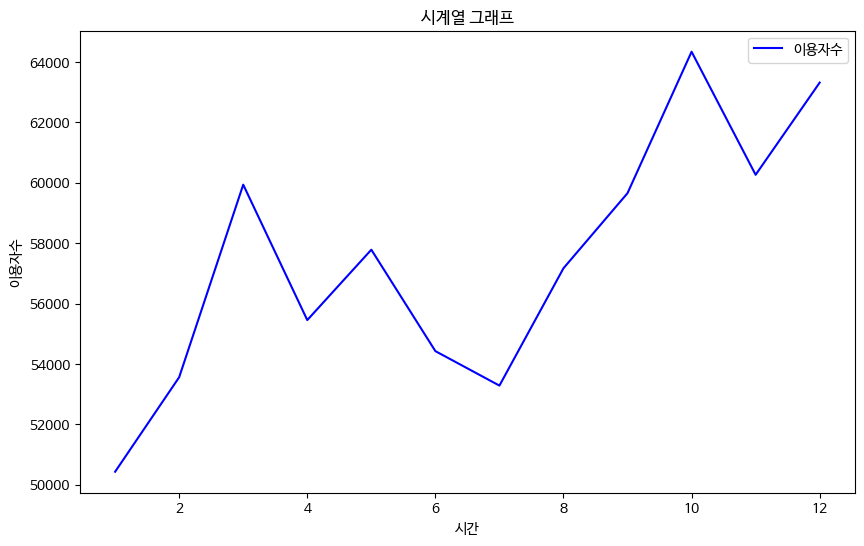

In [ ]:
draw(종로3가)

In [ ]:
# 정상성 확인
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.이용자수)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST 결과')
adf_test(종로3가)

ADF TEST 결과
ADF Statistics: -1.873347
p-value: 0.344702
num of lags: 0.000000
num of observations: 11.000000
Critical values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


=> 정상성 만족 X

In [ ]:
종로3가.index = 종로3가['월']
종로3가.set_index('월', inplace=True)

<Axes: xlabel='월'>

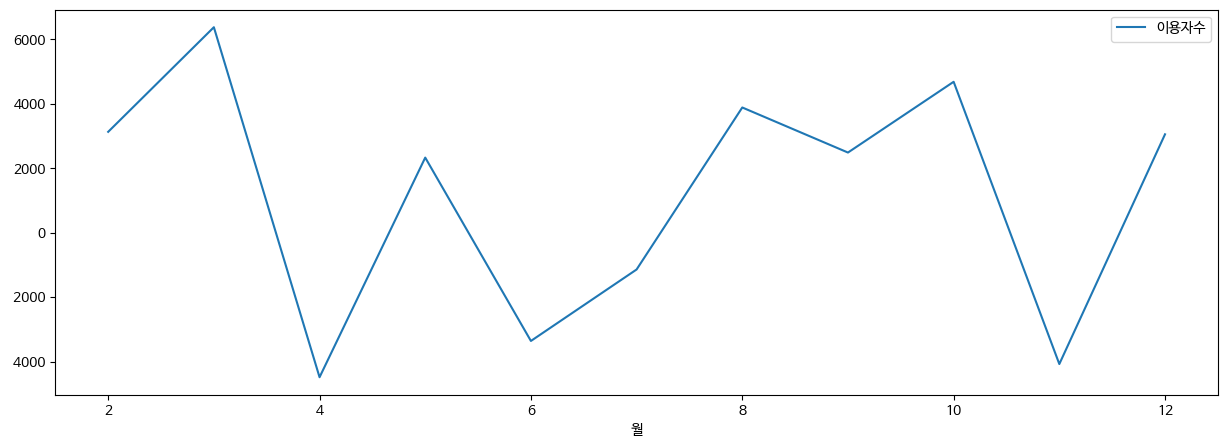

In [ ]:
# 1차 차분 데이터 diff1
dff1_종로3가 = 종로3가.diff().dropna()
dff1_종로3가.plot(figsize=(15,5))

In [ ]:
#1차 차분 뒤 ADF Test 결과
print('ADF TEST 결과')
adf_test(dff1_종로3가)

ADF TEST 결과
ADF Statistics: -2.239208
p-value: 0.192324
num of lags: 3.000000
num of observations: 7.000000
Critical values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


<Axes: xlabel='월'>

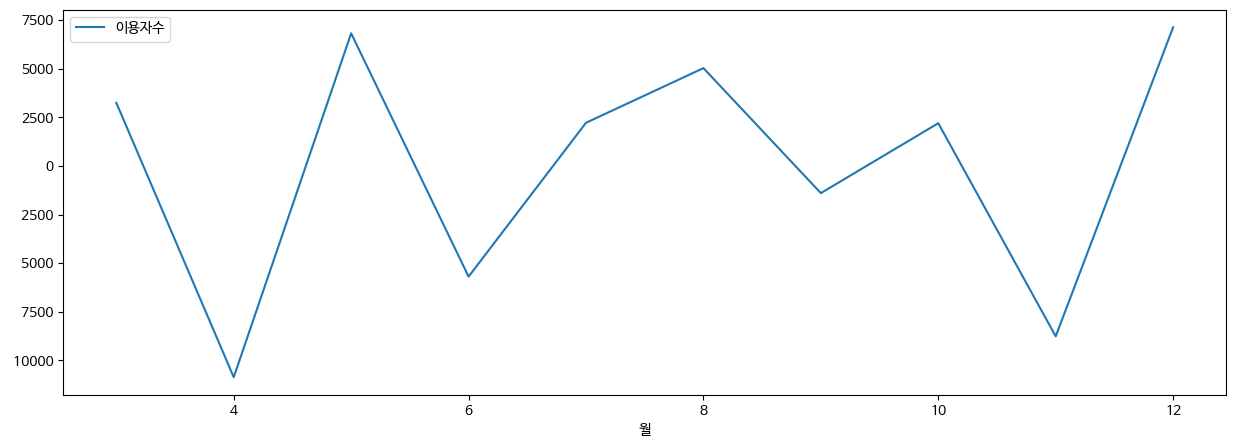

In [ ]:
# 2차 차분 데이터 diff2
dff2_종로3가 = dff1_종로3가.diff().dropna()
dff2_종로3가.plot(figsize=(15,5))

In [ ]:
#2차 차분 뒤 ADF Test 결과
print('ADF TEST 결과')
adf_test(dff2_종로3가)

ADF TEST 결과
ADF Statistics: -6.367315
p-value: 0.000000
num of lags: 0.000000
num of observations: 9.000000
Critical values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


2차 차분이 적정 -> d = 2

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from pmdarima.arima import ndiffs

model1 = pm.auto_arima(
            y=종로3가.이용자수,
            d=2,
            start_p=0, max_p=3,
            start_q=0, max_q=3,
            m=1, seasonal=True, # 계절성 有
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=204.708, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=205.799, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=205.289, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=204.628, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=204.684, Time=0.24 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=205.347, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=204.541, Time=0.26 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=203.512, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=205.326, Time=0.40 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=205.577, Time=0.23 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 2.459 seconds


In [ ]:
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(3, 2, 0)   Log Likelihood                 -97.756
Date:                Sun, 05 May 2024   AIC                            203.512
Time:                        13:25:42   BIC                            204.722
Sample:                             0   HQIC                           202.184
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0512      0.230     -0.223      0.824      -0.502       0.399
ar.L2          0.0494      0.250      0.198      0.843      -0.440       0.539
ar.L3         -0.1688      0.205     -0.824      0.4

In [ ]:
# model1.plot_diagnostics(figsize=(16,8))
# plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model1_fit = pm.auto_arima(
    	    y=종로3가.이용자수,
 	        d=2,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            m=1, seasonal=True, # 계절성 有!
            stepwise=True,
            trace=True
)
print(model1_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=204.708, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=205.799, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=205.289, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=204.628, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=204.684, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=205.347, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=204.541, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=206.541, Time=0.20 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.324 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -99.270
Date:                Sun, 05 May 2024   AIC                   

In [ ]:
# forecast 함수
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )

def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


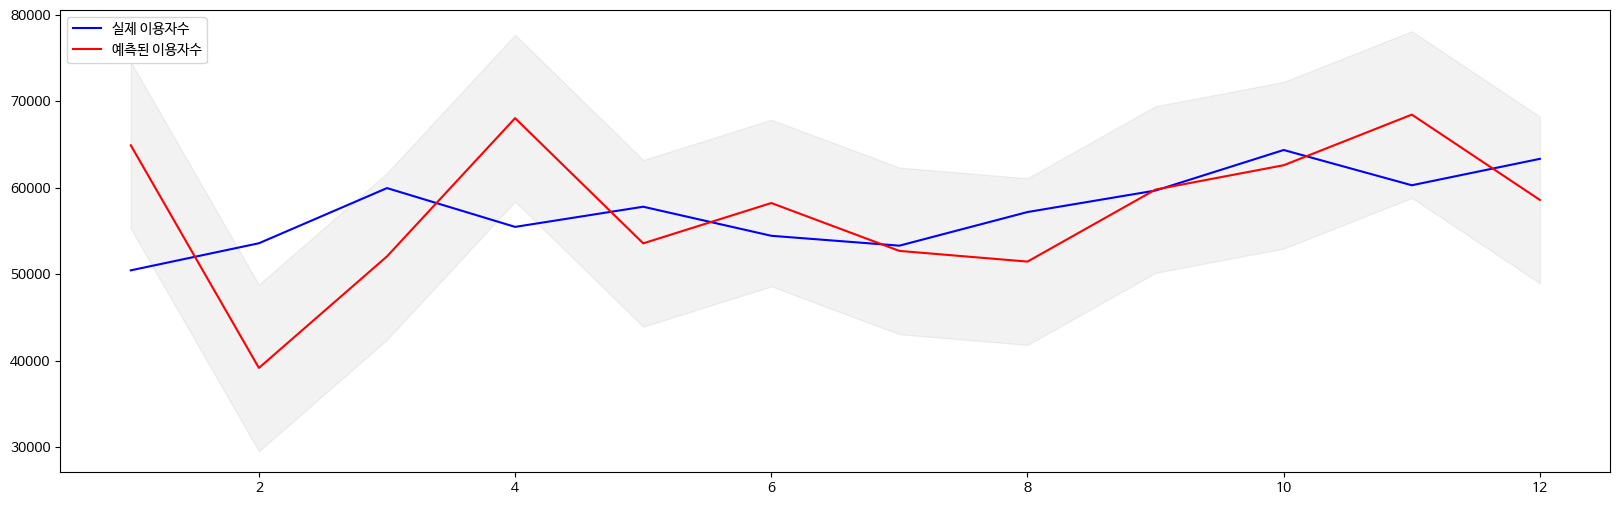

In [ ]:
# Forecast
fc, upper, lower = forecast(len(종로3가), model1_fit, 종로3가.index, data = 종로3가.이용자수)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower, index=종로3가.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=종로3가.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(종로3가, c='b', label='실제 이용자수')
plt.plot(fc, c='r',label='예측된 이용자수')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()

In [ ]:
fc

월
1     64890.902840
2     39142.117760
3     52041.572312
4     68027.080770
5     53548.369847
6     58212.887831
7     52676.019171
8     51440.436242
9     59773.404267
10    62583.272969
11    68436.206509
12    58567.251083
dtype: float64

In [ ]:
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
prediction_종로3가= pd.DataFrame({'이용자수예측':fc}, index=fc.index)
prediction_종로3가
prediction_종로3가['비율'] = prediction_종로3가['이용자수예측'] / prediction_종로3가['이용자수예측'].sum()
prediction_종로3가

,이용자수예측,비율
월,,
1,64890.9028,0.0941
2,39142.1178,0.0568
3,52041.5723,0.0755
4,68027.0808,0.0987
5,53548.3698,0.0777
6,58212.8878,0.0844
7,52676.0192,0.0764
8,51440.4362,0.0746
9,59773.4043,0.0867


In [ ]:
def pred(fc):
    pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
    prediction_종로3가= pd.DataFrame({'이용자수예측':fc}, index=fc.index)
    prediction_종로3가
    prediction_종로3가['비율'] = prediction_종로3가['이용자수예측'] / prediction_종로3가['이용자수예측'].sum()
    return prediction_종로3가

### 서울역 시계열 예측

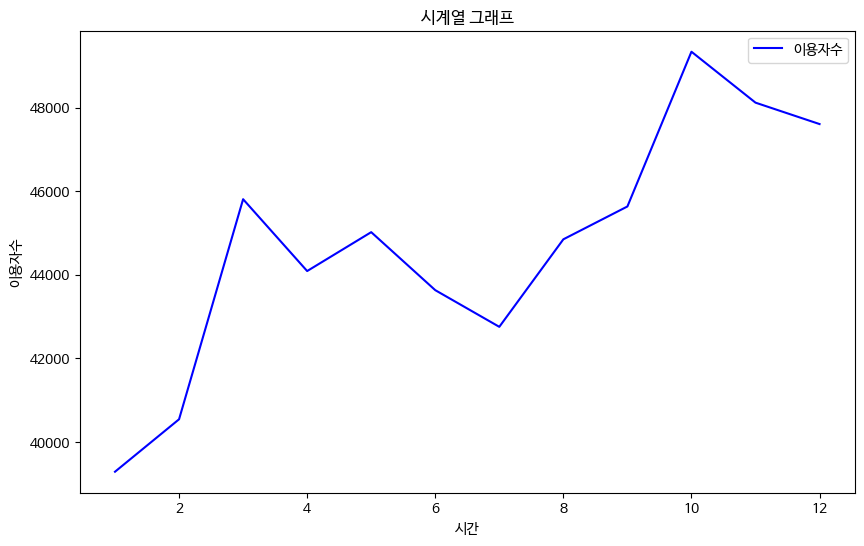

In [ ]:
draw(서울역)

In [ ]:
print('ADF TEST 결과')
adf_test(서울역)
서울역.index = 서울역['월']
서울역.set_index('월', inplace=True)

ADF TEST 결과
ADF Statistics: -2.889904
p-value: 0.046535
num of lags: 4.000000
num of observations: 7.000000
Critical values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


<Axes: xlabel='월'>

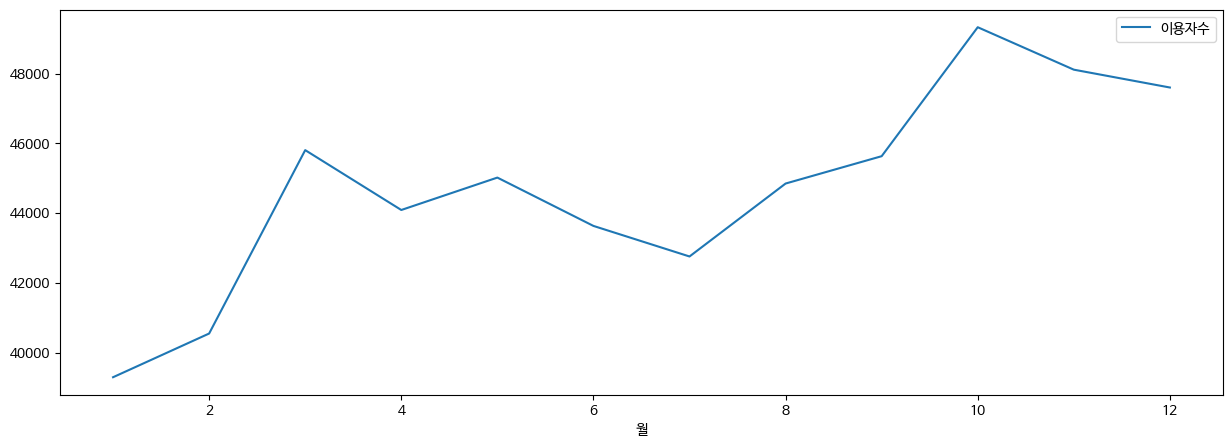

In [ ]:
서울역.plot(figsize=(15,5))

<Axes: xlabel='월'>

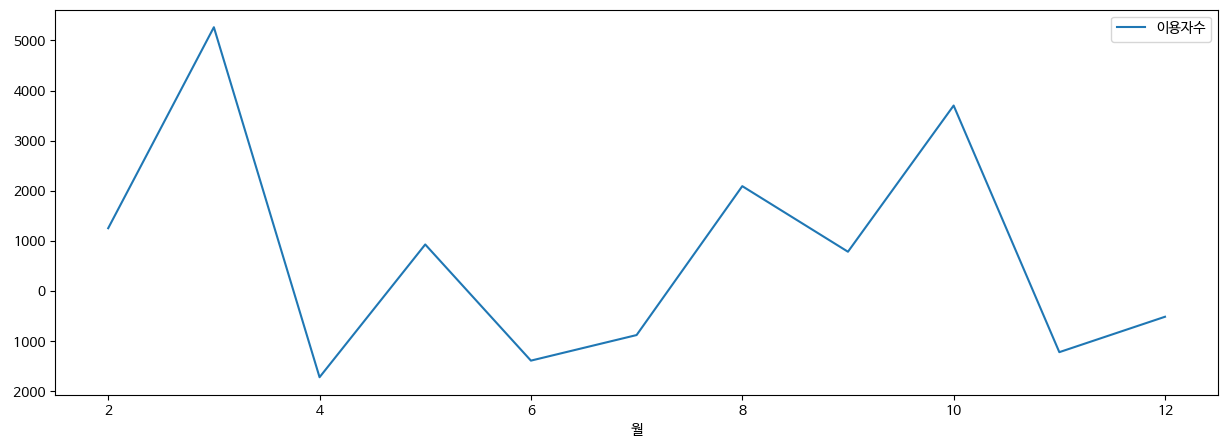

In [ ]:
#1차 차분 데이터 diff1
dff1_서울역 = 서울역.diff().dropna()
dff1_서울역.plot(figsize=(15,5))

In [ ]:
adf_test(dff1_서울역)

ADF Statistics: -4.072300
p-value: 0.001076
num of lags: 3.000000
num of observations: 7.000000
Critical values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


=> 차분안해도 괜찮으나 1번 차분하는 것이 더 예측력이 좋음

In [ ]:
model2_fit = pm.auto_arima(
    	    y=서울역.이용자수,
 	        d=1,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            m=1, seasonal=True, # 계절성 有
            stepwise=True,
            trace=True
)
print(model2_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=203.829, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=205.894, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=206.868, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=203.133, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=206.995, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.401 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -100.566
Date:                Sun, 05 May 2024   AIC                            203.133
Time:                        13:59:53   BIC                            203.531
Sample:                             0   HQIC                           202.882
                                 - 12                                         
Co

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


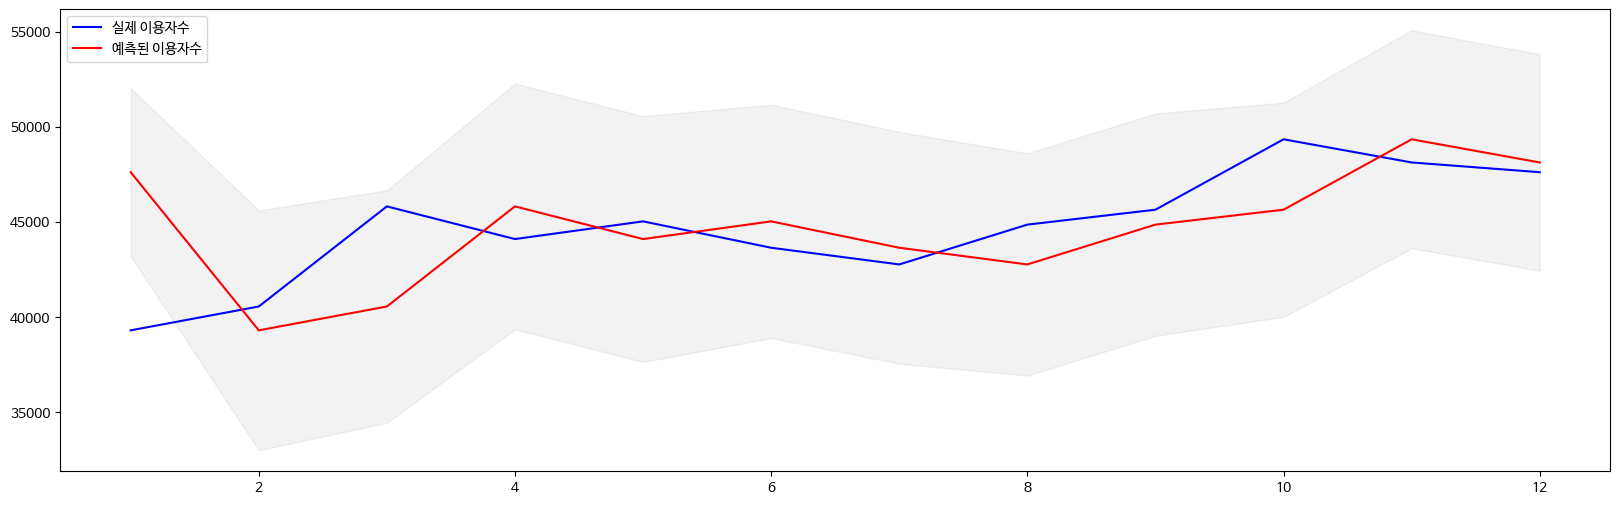

In [ ]:
# Forecast
fc2, upper2, lower2 = forecast(len(서울역), model2_fit, 서울역.index, data = 서울역['이용자수'])
# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower2, index=서울역.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper2, index=서울역.index)  # 예측결과의 상한 바운드
# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(서울역, c='b', label='실제 이용자수')
plt.plot(fc2, c='r',label='예측된 이용자수')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()

In [ ]:
fc2

월
1    46265.0248
2    41177.6989
3    41837.8803
4    45087.3056
5    43946.8638
6    44517.5421
7    43704.5578
8    43176.7375
9    44407.2314
10   44897.0462
11   47160.8160
12   46522.9958
dtype: float64

In [ ]:
pred(fc2)

,이용자수예측,비율
월,,
1,46265.0248,0.0868
2,41177.6989,0.0773
3,41837.8803,0.0785
4,45087.3056,0.0846
5,43946.8638,0.0825
6,44517.5421,0.0836
7,43704.5578,0.0820
8,43176.7375,0.0811
9,44407.2314,0.0834


### 잠실(송파구청) 시계열 분석 및 예측

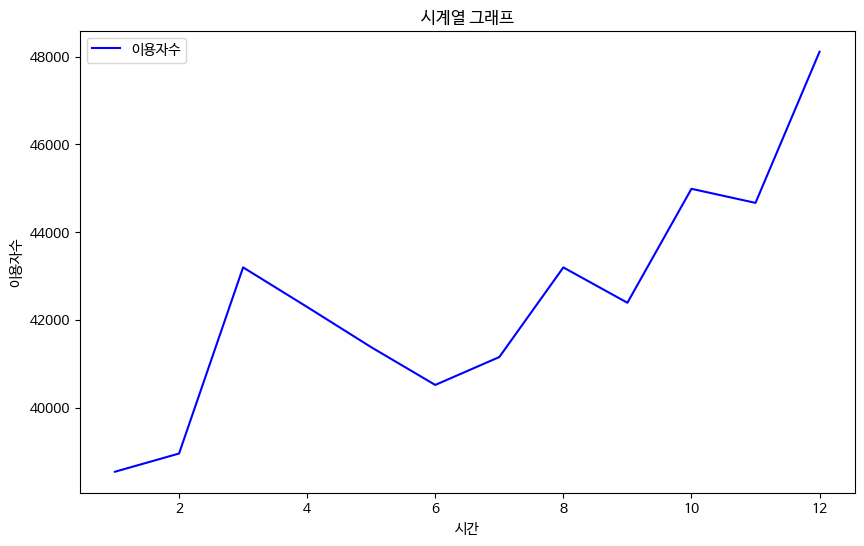

In [ ]:
draw(잠실)

In [ ]:
print('ADF TEST 결과')
adf_test(잠실)
잠실.set_index('월', inplace=True)

ADF TEST 결과
ADF Statistics: 2.384788
p-value: 0.999003
num of lags: 4.000000
num of observations: 7.000000
Critical values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


<Axes: xlabel='월'>

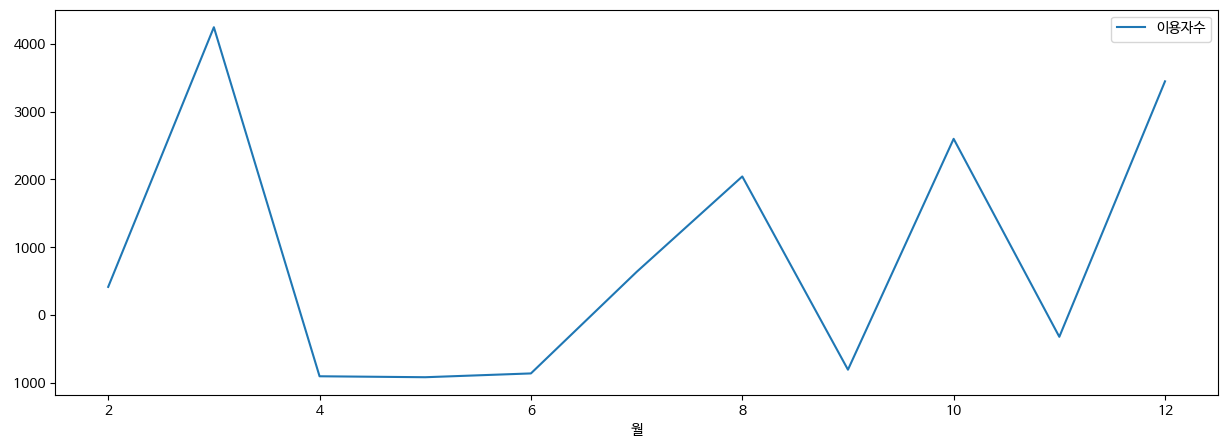

In [ ]:
dff1_잠실 = 잠실.diff().dropna()
dff1_잠실.plot(figsize=(15,5))

In [ ]:
adf_test(dff1_잠실)

ADF Statistics: -1.894718
p-value: 0.334550
num of lags: 2.000000
num of observations: 8.000000
Critical values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


<Axes: xlabel='월'>

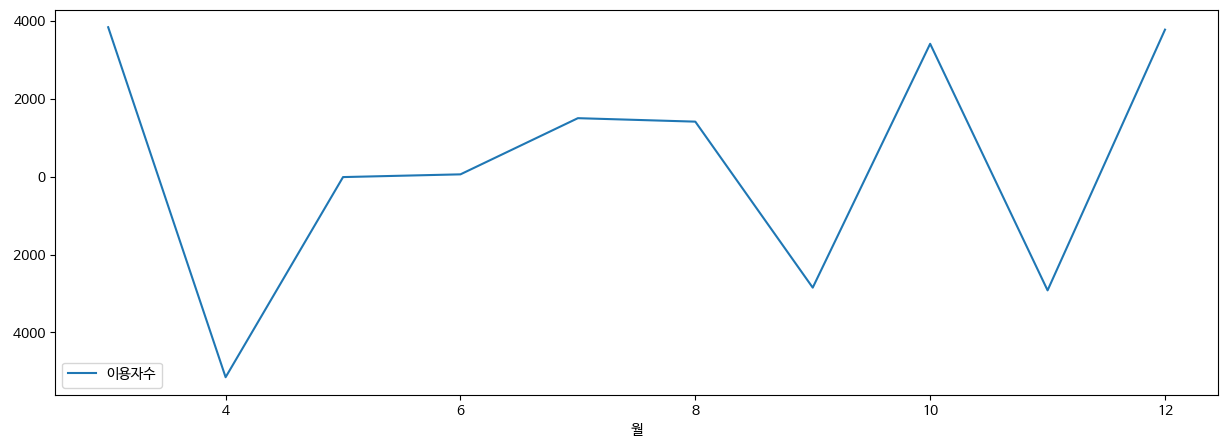

In [ ]:
dff2_잠실 = dff1_잠실.diff().dropna()
dff2_잠실.plot(figsize=(15,5))

In [ ]:
adf_test(dff2_잠실)

ADF Statistics: -8.023496
p-value: 0.000000
num of lags: 3.000000
num of observations: 6.000000
Critical values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


=> 2차 차분까지 진행해야 정상성 만족

In [ ]:
model3_fit = pm.auto_arima(
    	    y=잠실.이용자수,
 	        d=2,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            m=1, seasonal=True, # 계절성 有!
            stepwise=True,
            trace=True
)
print(model3_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=190.266, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=188.891, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=189.368, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=186.543, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=188.518, Time=0.29 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=188.345, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.916 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -90.272
Date:                Sun, 05 May 2024   AIC                            186.543
Time:                        13:55:11   BIC                            187.451
Sample:                           

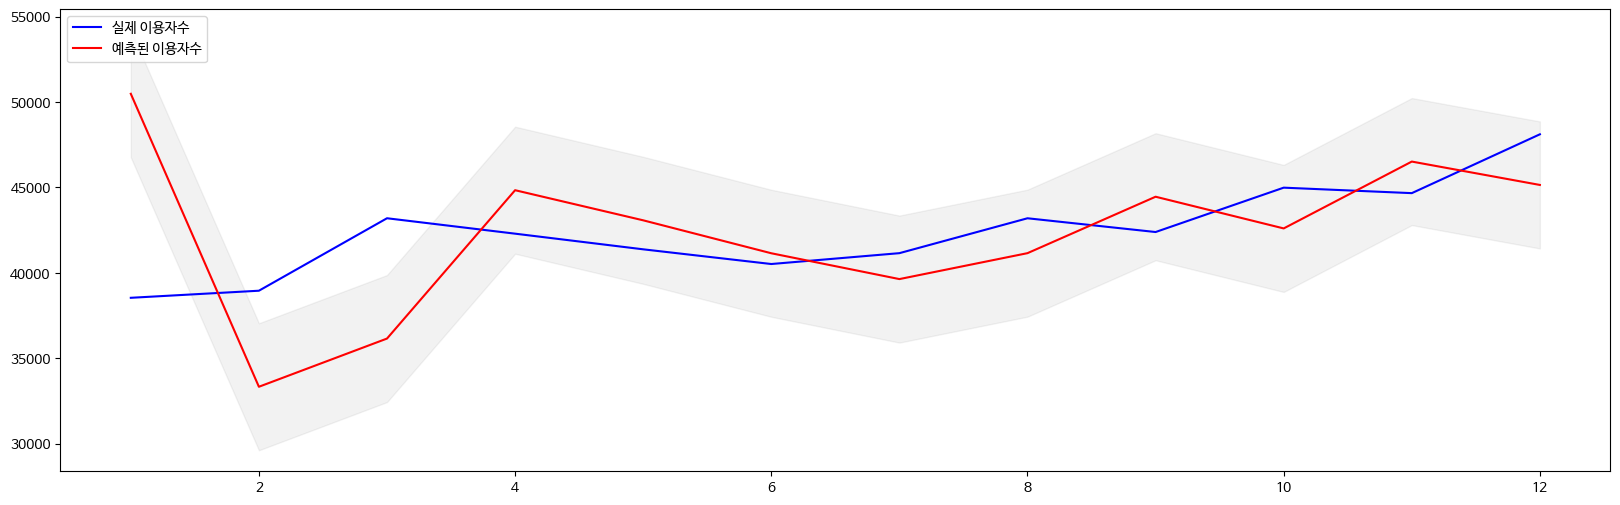

In [ ]:
# Forecast
fc3, upper3, lower3 = forecast(len(잠실), model3_fit, 잠실.index, data = 잠실['이용자수'])
# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower3, index=잠실.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper3, index=잠실.index)  # 예측결과의 상한 바운드
# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(잠실, c='b', label='실제 이용자수')
plt.plot(fc3, c='r',label='예측된 이용자수')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()


In [ ]:
fc3

월
1    50487.0290
2    33324.4551
3    36148.3149
4    44839.1532
5    43074.7859
6    41145.2130
7    39632.3493
8    41151.2239
9    44457.1798
10   42600.0011
11   46516.3850
12   45146.9106
dtype: float64

In [ ]:
pred(fc3)

,이용자수예측,비율
월,,
1,50487.0290,0.0993
2,33324.4551,0.0655
3,36148.3149,0.0711
4,44839.1532,0.0882
5,43074.7859,0.0847
6,41145.2130,0.0809
7,39632.3493,0.0779
8,41151.2239,0.0809
9,44457.1798,0.0874


## 전체 이용자로 시계열 분석 및 예측 (정류장 통일)

In [ ]:
final_month = final[[ '1월_장애인_승객수', '2월_장애인_승객수', '3월_장애인_승객수', '4월_장애인_승객수',
       '5월_장애인_승객수', '6월_장애인_승객수',
       '7월_장애인_승객수', '8월_장애인_승객수', '9월_장애인_승객수', '10월_장애인_승객수', '11월_장애인_승객수',
       '12월_장애인_승객수']]
final_month

,1월_장애인_승객수,2월_장애인_승객수,3월_장애인_승객수,4월_장애인_승객수,5월_장애인_승객수,6월_장애인_승객수,7월_장애인_승객수,8월_장애인_승객수,9월_장애인_승객수,10월_장애인_승객수,11월_장애인_승객수,12월_장애인_승객수
0,13132,12952,14701,13690,13948,14248,14304,15118,16471,16307,16605,16820
1,7877,7955,8643,8237,8569,8439,8147,8585,8704,9210,9252,9197
2,6304,6610,7479,6884,7121,7188,7055,7049,7045,7553,7325,7181
3,8749,8915,10235,9619,10203,10028,9683,10204,10431,10910,10699,10709
4,4984,5080,5412,5150,5274,5144,5463,5616,5626,5626,5714,5691
...,...,...,...,...,...,...,...,...,...,...,...,...
236,9234,9515,10874,10143,9944,9644,9698,10636,10434,11155,11274,11044
237,14869,15613,17468,16619,17248,16602,16065,16785,18801,18801,18299,18130
238,15359,15815,18467,17398,17860,16809,16939,17114,19043,19043,18511,18798
239,25181,25518,28498,26838,27117,26412,26890,28940,30693,30693,29902,30394


In [ ]:
final_month.loc["Mean"] = final_month.mean()

In [ ]:
user_avr = pd.DataFrame(final_month.loc["Mean"])

In [ ]:
user_avr

,Mean
1월_장애인_승객수,11246.5892
2월_장애인_승객수,11628.2490
3월_장애인_승객수,13211.4523
4월_장애인_승객수,12480.4149
5월_장애인_승객수,12779.7095
6월_장애인_승객수,12485.8382
7월_장애인_승객수,12380.1826
8월_장애인_승객수,13077.3029
9월_장애인_승객수,13528.3568
10월_장애인_승객수,14215.8589


In [ ]:
user_avr.columns=["이용자수"]

In [ ]:
user_avr

,이용자수
1월_장애인_승객수,11246.5892
2월_장애인_승객수,11628.2490
3월_장애인_승객수,13211.4523
4월_장애인_승객수,12480.4149
5월_장애인_승객수,12779.7095
6월_장애인_승객수,12485.8382
7월_장애인_승객수,12380.1826
8월_장애인_승객수,13077.3029
9월_장애인_승객수,13528.3568
10월_장애인_승객수,14215.8589


In [ ]:
adf_test(user_avr)

ADF Statistics: -0.165046
p-value: 0.942562
num of lags: 4.000000
num of observations: 7.000000
Critical values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


<Axes: >

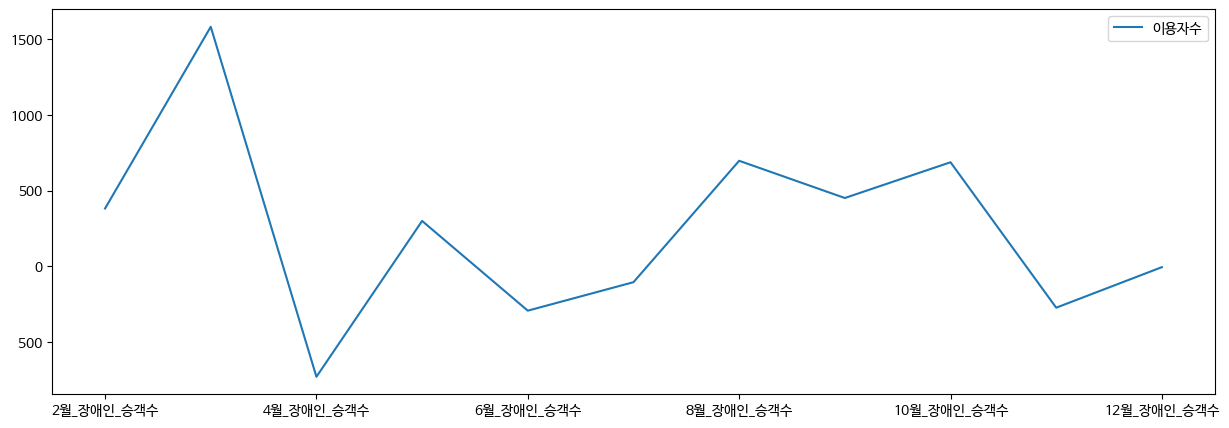

In [ ]:
# 1차 차분 데이터 diff1
dff1_user = user_avr.diff().dropna()
dff1_user.plot(figsize=(15,5))

In [ ]:
adf_test(dff1_user)

ADF Statistics: -3.915698
p-value: 0.001922
num of lags: 3.000000
num of observations: 7.000000
Critical values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


=> 1차 차분으로 정상성 만족

In [ ]:
model4_fit = pm.auto_arima(
    	    y=user_avr.이용자수,
 	        d=1,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            m=1, seasonal=True, # 계절성 有!
            stepwise=True,
            trace=True
)
print(model4_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=175.932, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=177.848, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=177.862, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=175.623, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=178.003, Time=0.49 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.987 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -86.812
Date:                Sun, 05 May 2024   AIC                            175.623
Time:                        14:12:43   BIC                            176.021
Sample:                             0   HQIC                           175.373
                                 - 12                                         
Co

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


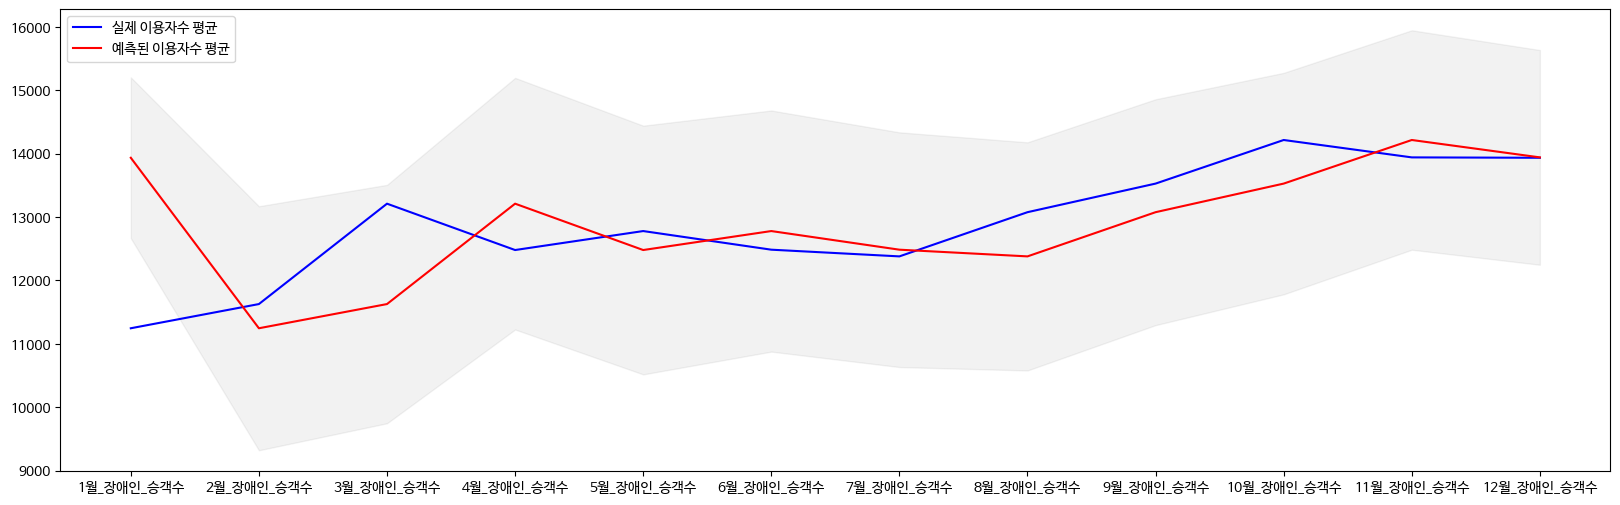

In [ ]:
# Forecast
fc4, upper4, lower4 = forecast(len(user_avr), model4_fit, user_avr.index, data = user_avr.이용자수)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower4, index=user_avr.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper4, index=user_avr.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(user_avr, c='b', label='실제 이용자수 평균')
plt.plot(fc4, c='r',label='예측된 이용자수 평균')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()

In [ ]:
fc4

1월_장애인_승객수    13935.4315
2월_장애인_승객수    11246.5892
3월_장애인_승객수    11628.2490
4월_장애인_승객수    13211.4523
5월_장애인_승객수    12480.4149
6월_장애인_승객수    12779.7095
7월_장애인_승객수    12485.8382
8월_장애인_승객수    12380.1826
9월_장애인_승객수    13077.3029
10월_장애인_승객수   13528.3568
11월_장애인_승객수   14215.8589
12월_장애인_승객수   13941.6224
dtype: float64

In [ ]:
pred(fc4)

,이용자수예측,비율
1월_장애인_승객수,13935.4315,0.0900
2월_장애인_승객수,11246.5892,0.0726
3월_장애인_승객수,11628.2490,0.0751
4월_장애인_승객수,13211.4523,0.0853
5월_장애인_승객수,12480.4149,0.0806
6월_장애인_승객수,12779.7095,0.0825
7월_장애인_승객수,12485.8382,0.0806
8월_장애인_승객수,12380.1826,0.0799
9월_장애인_승객수,13077.3029,0.0844
10월_장애인_승객수,13528.3568,0.0873
